In [150]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
import numpy as np

In [151]:
in_shape = (100, 100, 3) # input image

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=in_shape, name="conv2D_1"))
model.add(MaxPooling2D((2, 2), name="MaxPool_1"))

model.add(Conv2D(64, (3,3), activation='relu', name="conv2D_2"))
model.add(MaxPooling2D((2, 2), name="MaxPool_2"))

model.add(Conv2D(128, (3,3), activation='relu', name="conv2D_3"))
model.add(MaxPooling2D((2, 2), name="MaxPool_3"))

model.add(Flatten())

model.add(Dense(3, activation = "softmax"))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2D_1 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 MaxPool_1 (MaxPooling2D)    (None, 49, 49, 32)        0         
                                                                 
 conv2D_2 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 MaxPool_2 (MaxPooling2D)    (None, 23, 23, 64)        0         
                                                                 
 conv2D_3 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 MaxPool_3 (MaxPooling2D)    (None, 10, 10, 128)       0         
                                                                 
 flatten_6 (Flatten)         (None, 12800)            

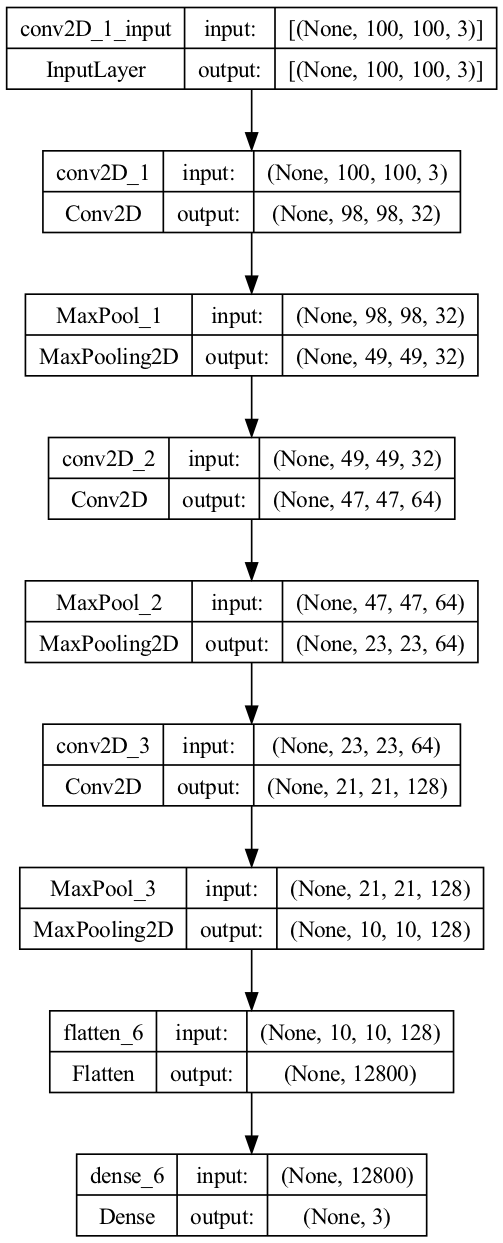

In [152]:
import pydotplus
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_convolu.png', show_shapes=True, show_layer_names=True, dpi=120)

<h3>Kenel</h3>

In [153]:
for layer in model.layers:
    print(layer.name)

conv2D_1
MaxPool_1
conv2D_2
MaxPool_2
conv2D_3
MaxPool_3
flatten_6
dense_6


In [154]:
for layer in model.layers: # filter conv2D
    if 'conv' not in layer.name:
        continue
    kernels, biases = layer.get_weights()
    print(layer.name, 'shape:', kernels.shape)

conv2D_1 shape: (3, 3, 3, 32)
conv2D_2 shape: (3, 3, 32, 64)
conv2D_3 shape: (3, 3, 64, 128)


In [155]:
model_layer_idx = 0
kernels, biases = model.layers[model_layer_idx].get_weights()
kernels.shape

(3, 3, 3, 32)

In [156]:
kernels

array([[[[ 9.03476179e-02, -4.76466417e-02,  1.29179999e-01,
           4.55354899e-02,  4.83417958e-02, -9.30817425e-02,
          -2.41883099e-03, -1.36996582e-01, -1.14591077e-01,
           4.53324765e-02,  1.21150568e-01,  9.85315144e-02,
          -9.98741686e-02,  1.23033747e-01, -7.87760839e-02,
          -9.23489183e-02, -9.26003158e-02,  1.02134466e-01,
           2.40573883e-02, -9.59075242e-02,  6.72493875e-03,
          -1.15731530e-01, -1.21291861e-01,  7.68168569e-02,
          -8.74302983e-02,  5.20914048e-02,  8.51940215e-02,
          -2.83340737e-02,  5.51579446e-02,  2.82519758e-02,
          -7.86219239e-02, -5.43010309e-02],
         [ 6.40894175e-02,  1.18412212e-01,  3.81317586e-02,
           1.16580471e-01,  9.37272012e-02, -4.00547907e-02,
          -1.97176933e-02,  1.24576345e-01, -3.09944302e-02,
          -1.51091367e-02,  5.37969917e-02,  5.31430542e-03,
           1.24825582e-01,  9.23041999e-02, -1.04965016e-01,
          -2.10681781e-02,  5.51775098e-

In [157]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [158]:
kernel_idx = 1
kernel_i = kernels[:, :, 0, kernel_idx]
print(kernel_i.round(2))

[[-0.05 -0.02 -0.08]
 [ 0.02 -0.01  0.06]
 [-0.07 -0.04  0.02]]


([], [])

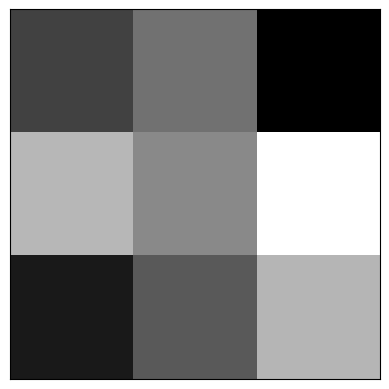

In [159]:
plt.imshow(kernel_i, cmap='gray')
plt.xticks([])
plt.yticks([])

In [160]:
layername = model.layers[model_layer_idx].name
layername

'conv2D_1'

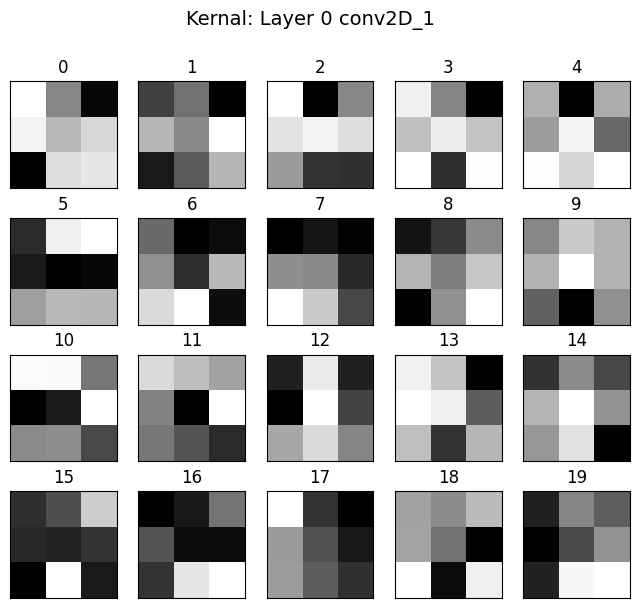

In [161]:
nplots = 20
fig = plt.figure(figsize=(8, 6.8))

fig.suptitle(f'Kernal: Layer {model_layer_idx} {layername}', fontsize=14)

for j in range(nplots):
    plt.subplot(4, 5, j+1)
    plt.imshow(kernels[:, :, 0, j], cmap='gray')
    plt.title(j)
    plt.xticks([])
    plt.yticks([])
    
plt.show()


(([], []), ([], []))

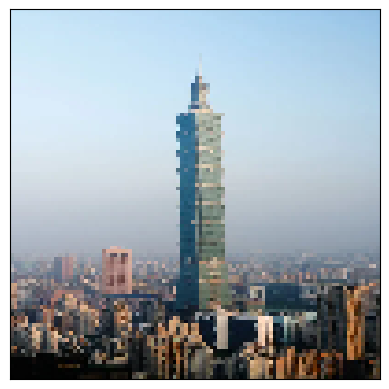

In [162]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from tensorflow.keras.models import Model
from matplotlib import pyplot

image = load_img('image/tower-Taipei-101-Taiwan.jpg.webp', target_size=(100, 100))

plt.imshow(image)
plt.xticks([]), plt.yticks([])

In [163]:
type(image)

PIL.Image.Image

In [164]:
img = img_to_array(image)
print(type(img))
print('shape : ',img.shape)
print('min max pixel value : ', np.min(img), np.max(img))

<class 'numpy.ndarray'>
shape :  (100, 100, 3)
min max pixel value :  0.0 255.0


In [165]:
img = np.expand_dims(img, axis=0)
img.shape

(1, 100, 100, 3)

<h3>Convolution</h3>

In [166]:
model_layer_idx = 0
md = Model(inputs=model.input, outputs=model.layers[model_layer_idx].output)

feature_maps = md.predict(img)

feature_maps.shape

1/1 [==============================] - 0s 20ms/step


(1, 98, 98, 32)

In [167]:
layername = model.layers[model_layer_idx].name
layername

'conv2D_1'

In [168]:
feature_maps.min(), feature_maps.max()

(0.0, 271.51608)

In [169]:
f_min, f_max  = feature_maps.min(), feature_maps.max()
feature_maps = (feature_maps-f_min) / (f_max - f_min)
feature_maps.min(), feature_maps.max()

(0.0, 1.0)

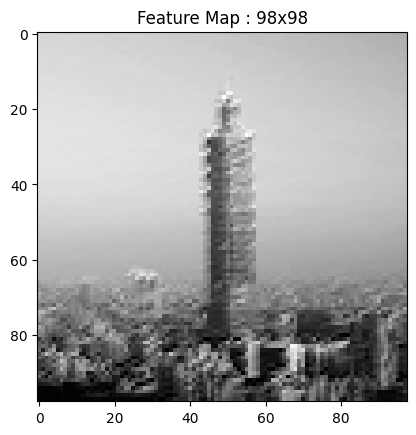

In [170]:
sample_idx = 0
fea_idx = 0

feature_maps_i = feature_maps[sample_idx, :, :, fea_idx]


plt.title(f'Feature Map : {feature_maps_i.shape[0]}x{feature_maps_i.shape[0]}')
plt.imshow(feature_maps_i, cmap='gray')

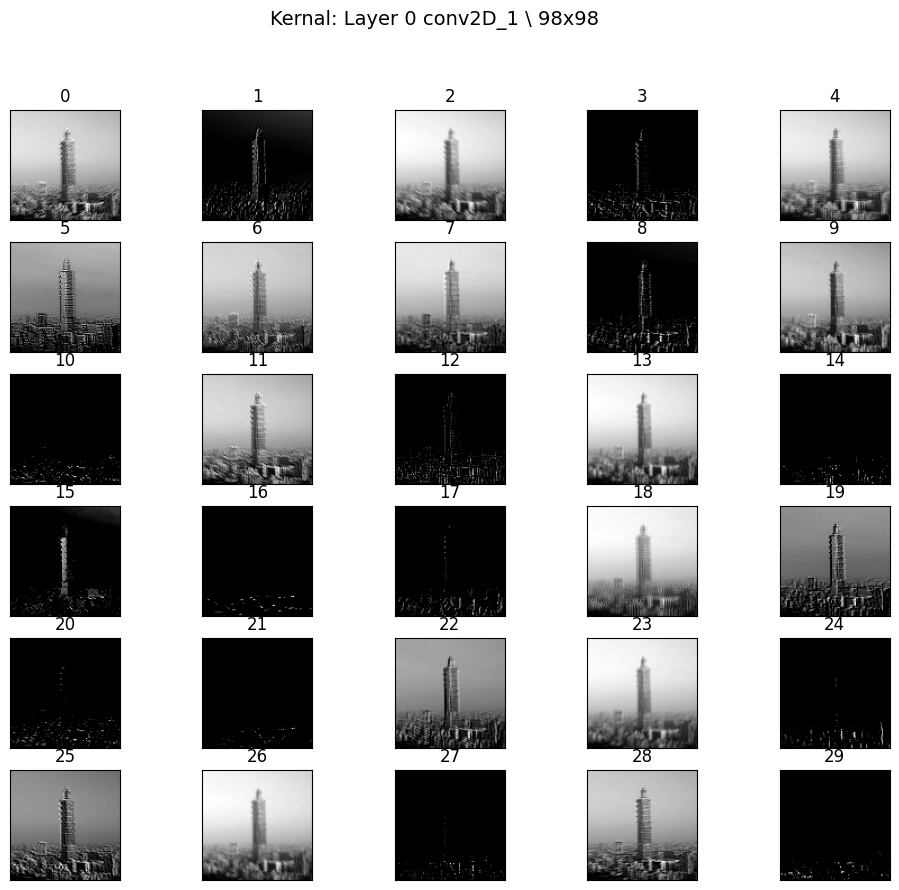

In [171]:
nplots = 30
fig = plt.figure(figsize=(12, 10))

fig.suptitle(f'Kernal: Layer {model_layer_idx} {layername} \ {feature_maps_i.shape[0]}x{feature_maps_i.shape[0]}', 
             fontsize=14)

for j in range(nplots):
    plt.subplot(6, 5, j+1)
    plt.imshow(feature_maps[sample_idx, :, :, j], cmap='gray')
    plt.title(j)
    plt.xticks([])
    plt.yticks([])
    
plt.show()